I will be trying different machine learning techniques to make prediction on this dataset.

We will find out which algorithm has the greatest accuracy using ROC-AUC curves.

Before that, we shall do some feature engineering on our data to get the best results faster.

In [1]:
# This R environment comes with all of CRAN preinstalled, as well as many other helpful packages
# The environment is defined by the kaggle/rstats docker image: https://github.com/kaggle/docker-rstats
# For example, here's several helpful packages to load in 

library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(rpart)
library(rattle)
library(ROCR)
library(randomForest)
library(gridExtra)
library(reshape)
library(caTools)
library(e1071)
library(caret)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

system("ls ../input")

# Any results you write to the current directory are saved as output.

R session is headless; GTK+ not initialized.
Rattle: A free graphical interface for data mining with R.
Version 4.1.0 Copyright (c) 2006-2015 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.
Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin


Attaching package: ‘gridExtra’

The following object is masked from ‘package:randomForest’:

    combine

Loading required package: lattice


In [2]:
df <- read.csv("../input/HR_comma_sep.csv")
# Look at the data
head(df)
summary(df)
str(df)
sum(is.na(df)) # Check no. of missing values

satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0.38,0.53,2,157,3,0,1,0,sales,low
0.80,0.86,5,262,6,0,1,0,sales,medium
0.11,0.88,7,272,4,0,1,0,sales,medium
0.72,0.87,5,223,5,0,1,0,sales,low
0.37,0.52,2,159,3,0,1,0,sales,low
0.41,0.50,2,153,3,0,1,0,sales,low


 satisfaction_level last_evaluation  number_project  average_montly_hours
 Min.   :0.0900     Min.   :0.3600   Min.   :2.000   Min.   : 96.0       
 1st Qu.:0.4400     1st Qu.:0.5600   1st Qu.:3.000   1st Qu.:156.0       
 Median :0.6400     Median :0.7200   Median :4.000   Median :200.0       
 Mean   :0.6128     Mean   :0.7161   Mean   :3.803   Mean   :201.1       
 3rd Qu.:0.8200     3rd Qu.:0.8700   3rd Qu.:5.000   3rd Qu.:245.0       
 Max.   :1.0000     Max.   :1.0000   Max.   :7.000   Max.   :310.0       
                                                                         
 time_spend_company Work_accident         left        promotion_last_5years
 Min.   : 2.000     Min.   :0.0000   Min.   :0.0000   Min.   :0.00000      
 1st Qu.: 3.000     1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.00000      
 Median : 3.000     Median :0.0000   Median :0.0000   Median :0.00000      
 Mean   : 3.498     Mean   :0.1446   Mean   :0.2381   Mean   :0.02127      
 3rd Qu.: 4.000     3rd Qu.:

'data.frame':	14999 obs. of  10 variables:
 $ satisfaction_level   : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ last_evaluation      : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ number_project       : int  2 5 7 5 2 2 6 5 5 2 ...
 $ average_montly_hours : int  157 262 272 223 159 153 247 259 224 142 ...
 $ time_spend_company   : int  3 6 4 5 3 3 4 5 5 3 ...
 $ Work_accident        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ left                 : int  1 1 1 1 1 1 1 1 1 1 ...
 $ promotion_last_5years: int  0 0 0 0 0 0 0 0 0 0 ...
 $ sales                : Factor w/ 10 levels "accounting","hr",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ salary               : Factor w/ 3 levels "high","low","medium": 2 3 3 2 2 2 2 2 2 2 ...


[1] 0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


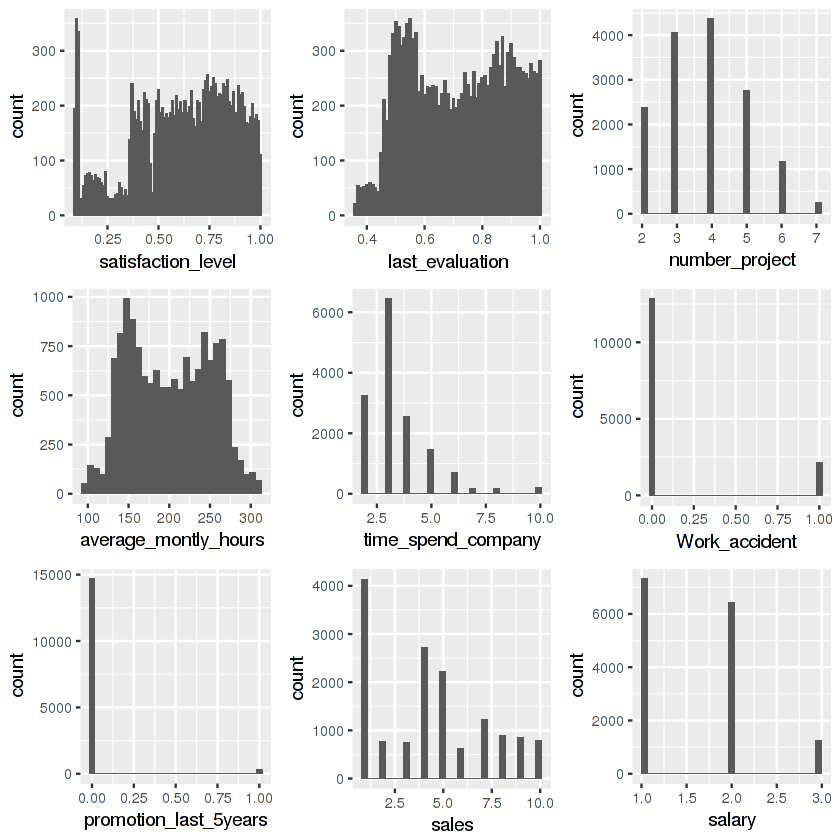

In [3]:
# Replace strings with numbers
sales <- unique(df$sales)
df$sales <- as.numeric(1:10)[match(df$sales, sales)] 
df$salary <- as.numeric(1:3)[match(df$salary, c('low', 'medium', 'high'))]
p1 <- qplot(satisfaction_level, data=df, geom="histogram", binwidth=0.01)
p2 <- qplot(last_evaluation, data=df, geom="histogram", binwidth=0.01)
p3 <- qplot(number_project, data=df, geom="histogram")
p4 <- qplot(average_montly_hours, data=df, geom="histogram")
p5 <- qplot(time_spend_company, data=df, geom="histogram") 
p6 <- qplot(Work_accident, data=df, geom="histogram")
p7 <- qplot(promotion_last_5years, data=df, geom="histogram")
p8 <- qplot(sales, data=df, geom="histogram")
p9 <- qplot(salary, data=df, geom="histogram")
grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, ncol = 3, nrow = 3)

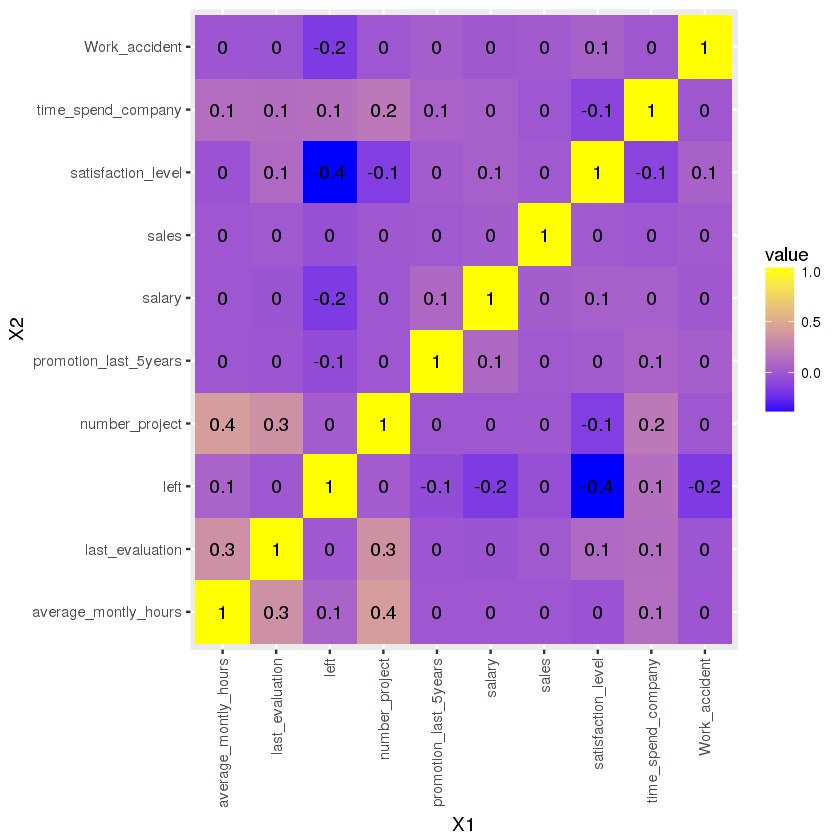

In [4]:
# From the above plot, we see that 'Work_accident' and 'promotion_last_5years' do not contribute much
# in predicting who will leave.
# Let us see if any variables are correlated
corr <- cor(df)
corr <- melt(corr)
ggplot(corr, aes(X1, X2, fill = value)) + geom_tile() + 
		scale_fill_gradient(low = "blue",  high = "yellow") + 
		geom_text(aes(label = round(value, 1))) +
		theme(axis.text.x=element_text(angle=90,hjust=1,vjust=0.5))

In [5]:
# None of the variables are highly correlated, so we will keep all of them except 
# 'Work_accident' and 'promotion_last_5years'
df$Work_accident <- NULL
df$promotion_last_5years <- NULL
# None of the variables need transformations, so we can now move on to doing predictions.

In [6]:
# Spliting data into train and test set
# By using the sample.split() we are actually creating a vector with two values TRUE and FALSE. 
# By setting the SplitRatio to 0.7, we are splitting the original dataset to 70% training and 30% testing data.
set.seed(300)
df$sp <- sample.split(df$left, SplitRatio=0.7)
# where df$sp== TRUE means to add only those rows that have value true for sp in the training dataset
train <- subset(df, df$sp==TRUE)
# where df$sp== FALSE means to add only those rows that have value false for sp in the testing dataset
test <- subset(df, df$sp==FALSE)

In [7]:
# let us first start with logistic regression
# Train the model using the training sets and check score
model_glm <- glm(left ~ ., data = train, family='binomial')
# Predict Output of test data
predicted_glm <- predict(model_glm, test, type='response')
predicted_glm <- ifelse(predicted_glm > 0.5,1,0)
# Confusion matrix of Logistic regression
table(test$left, predicted_glm)
# Accuracy of model
mean(predicted_glm==test$left)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

   predicted_glm
       0    1
  0 3187  241
  1  769  302

[1] 0.7755057

   predicted_dt
       0    1
  0 3393   35
  1   97  974

[1] 0.9706601

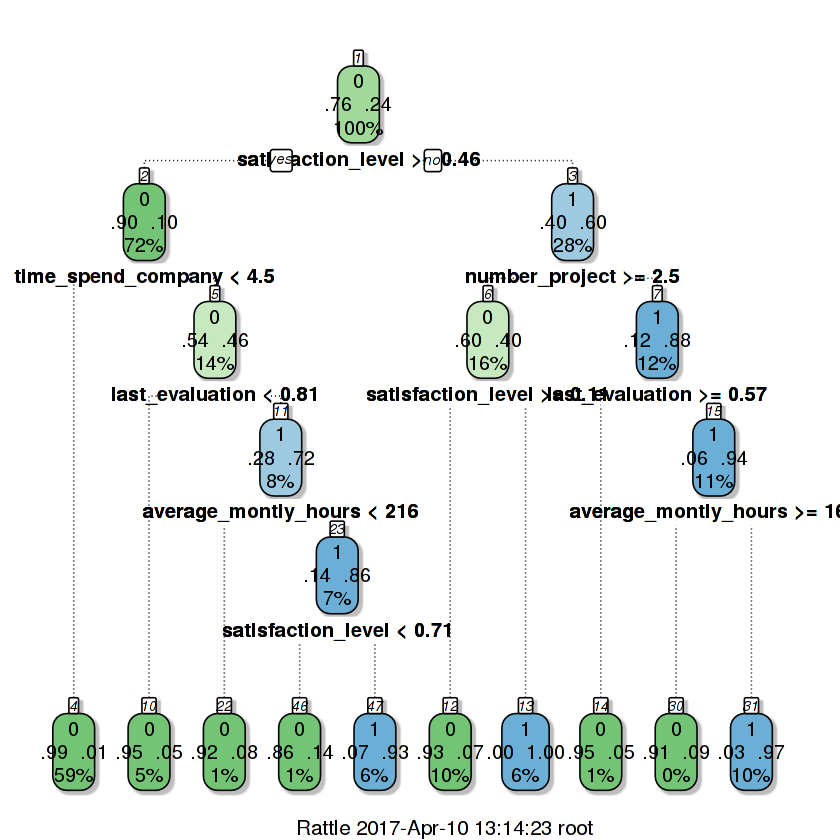

In [8]:
# Logistic regression is 77.55% accurate, which is fairly good
# But we would like to have more accuracy
# Let us try decision trees
model_dt <- rpart(left ~ ., data=train, method="class", minbucket=25)
# View decision tree plot
fancyRpartPlot(model_dt)
# Predict Output of test data
predicted_dt <- predict(model_dt, test, type="class")
# Confusion matrix of decision tree
table(test$left, predicted_dt)
# Accuracy of decision tree
mean(predicted_dt==test$left)

In [9]:
# Decision tree has an astonishing accuracy of 97.06%
# Let's see if we can do better than this
# We shall do random forests with 200 trees
model_rf <- randomForest(as.factor(left) ~ ., data=train, nsize=20, ntree=200)
# Predict Output of test data
predicted_rf <- predict(model_rf, test)
# Confusion matrix of random forest
table(test$left, predicted_rf)
# Accuracy of random forest
mean(predicted_rf==test$left)

   predicted_rf
       0    1
  0 3418   10
  1   43 1028

[1] 0.9882196

In [10]:
# Random forests increased the accuracy to 98.82%
# We shall see if Support vector machine performs as well as the above models
model_svm <- svm(left ~ ., data=train)
# Predict Output of test data
predicted_svm <- predict(model_svm, test)
predicted_svm <- ifelse(predicted_svm > 0.5,1,0)
# Confusion matrix of SVM
table(test$left, predicted_svm)
# Accuracy of SVM
mean(predicted_svm==test$left)

   predicted_svm
       0    1
  0 3373   55
  1  104  967

[1] 0.9646588

In [11]:
# SVM has accuracy of 96.46% which is good, but not the best.
# let us tune the parameter of the model to get better accuracy
model_svm <- svm(left ~ ., data=train, gamma=0.25, cost=10)
# Predict Output of test data
predicted_svm <- predict(model_svm, test)
predicted_svm <- ifelse(predicted_svm > 0.5,1,0)
# Confusion matrix of SVM
table(test$left, predicted_svm)
# Accuracy of SVM
mean(predicted_svm==test$left)

   predicted_svm
       0    1
  0 3411   17
  1   94  977

[1] 0.9753279

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

[1] "AUC of Logistic Regression: 0.813"
[1] "AUC of Decision Tree: 0.97"
[1] "AUC of Random Forest: 0.993"
[1] "AUC of Support Vector Machine: 0.981"


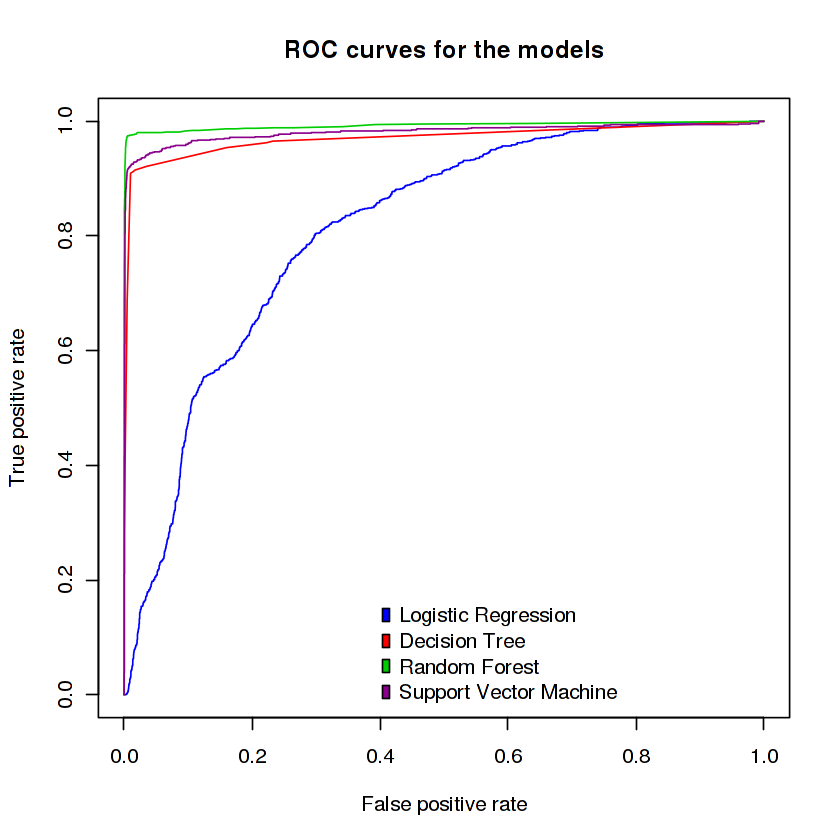

In [27]:
# Tuning the parameters increases the accuracy of SVM to 97.53%
# Let us plot the ROC curves for all the models
# Logistic regression
predict_glm_ROC <- predict(model_glm, test, type="response")
pred_glm <- prediction(predict_glm_ROC, test$left)
perf_glm <- performance(pred_glm, "tpr", "fpr")

# Decision tree
predict_dt_ROC <- predict(model_dt, test)
pred_dt <- prediction(predict_dt_ROC[,2], test$left)
perf_dt <- performance(pred_dt, "tpr", "fpr")

# Random forest
predict_rf_ROC <- predict(model_rf, test, type="prob")
pred_rf <- prediction(predict_rf_ROC[,2], test$left)
perf_rf <- performance(pred_rf, "tpr", "fpr")

# SVM
predict_svm_ROC <- predict(model_svm, test, type="response")
pred_svm <- prediction(predict_svm_ROC, test$left)
perf_svm <- performance(pred_svm, "tpr", "fpr")

# Area under the ROC curves
auc_glm <- performance(pred_glm,"auc")
auc_glm <- round(as.numeric(auc_glm@y.values),3)
auc_dt <- performance(pred_dt,"auc")
auc_dt <- round(as.numeric(auc_dt@y.values),3)
auc_rf <- performance(pred_rf,"auc")
auc_rf <- round(as.numeric(auc_rf@y.values),3)
auc_svm <- performance(pred_svm,"auc")
auc_svm <- round(as.numeric(auc_svm@y.values),3)
print(paste('AUC of Logistic Regression:',auc_glm))
print(paste('AUC of Decision Tree:',auc_dt))
print(paste('AUC of Random Forest:',auc_rf))
print(paste('AUC of Support Vector Machine:',auc_svm))


# Plotting the three curves
plot(perf_glm, main = "ROC curves for the models", col='blue')
plot(perf_dt,add=TRUE, col='red')
plot(perf_rf, add=TRUE, col='green3')
plot(perf_svm, add=TRUE, col='darkmagenta')
legend('bottom', c("Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Machine"), fill = c('blue','red','green3','darkmagenta'), bty='n')

From the above plot, we see that Random Forest performs best, with AUC of 0.993.